# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [66]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=imperial&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | susuman
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | el calafate
Processing Record 7 of Set 1 | mount horeb
Processing Record 8 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 9 of Set 1 | cidreira
Processing Record 10 of Set 1 | nar'yan-mar
Processing Record 11 of Set 1 | mossel bay
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | undurkhaan
Processing Record 14 of Set 1 | sydney
Processing Record 15 of Set 1 | margaret river
Processing Record 16 of Set 1 | hawaiian paradise park
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | tolanaro
Processing Record 19 of Set 1 | banikoara
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | ta`u
Processing Recor

In [67]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [68]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,81.95,69,93,1.01,US,1722708215
1,adamstown,-25.0660,-130.1015,69.35,72,6,13.73,PN,1722708216
2,port-aux-francais,-49.3500,70.2167,37.22,81,86,23.29,TF,1722708217
3,susuman,62.7833,148.1667,38.03,77,13,1.50,RU,1722708219
4,blackmans bay,-43.0167,147.3167,46.53,77,100,8.39,AU,1722708220


In [69]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [70]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,81.95,69,93,1.01,US,1722708215
1,adamstown,-25.0660,-130.1015,69.35,72,6,13.73,PN,1722708216
2,port-aux-francais,-49.3500,70.2167,37.22,81,86,23.29,TF,1722708217
3,susuman,62.7833,148.1667,38.03,77,13,1.50,RU,1722708219
4,blackmans bay,-43.0167,147.3167,46.53,77,100,8.39,AU,1722708220


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

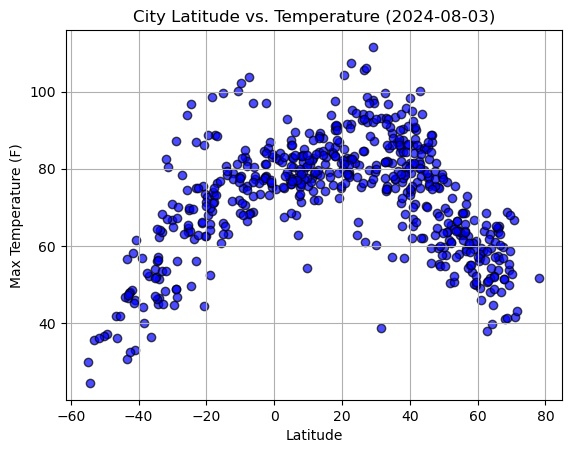

In [91]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, color='blue',edgecolor='black', alpha=0.7)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Temperature (2024-08-03)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

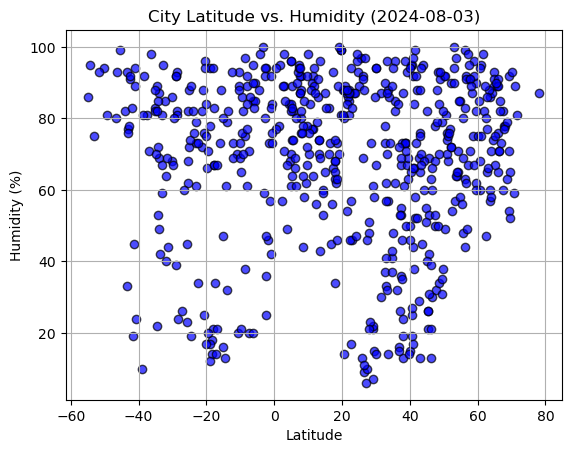

In [72]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, color='blue',edgecolor='black', alpha=0.7)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2024-08-03)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

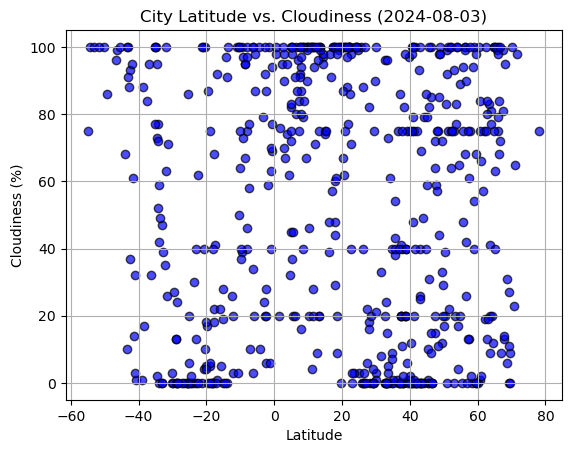

In [73]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, color='blue',edgecolor='black', alpha=0.7)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2024-08-03)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

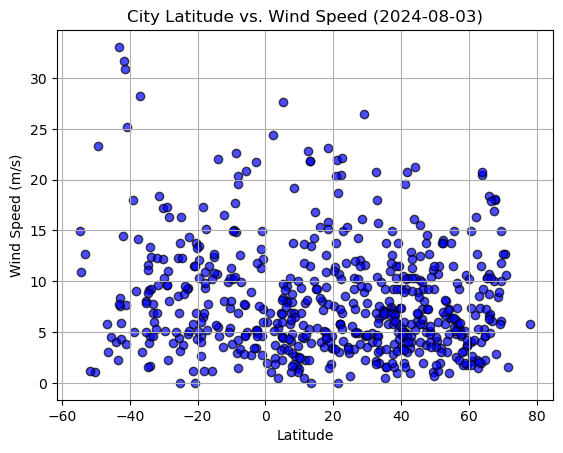

In [74]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, color='blue',edgecolor='black', alpha=0.7)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2024-08-03)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [76]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

In [77]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,81.95,69,93,1.01,US,1722708215
3,susuman,62.7833,148.1667,38.03,77,13,1.50,RU,1722708219
6,mount horeb,43.0086,-89.7385,84.99,65,0,4.00,US,1722708222
8,nar'yan-mar,67.6713,53.0870,51.37,78,13,18.03,RU,1722708226
10,georgetown,5.4112,100.3354,80.53,82,20,3.44,MY,1722708229


In [78]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,69.35,72,6,13.73,PN,1722708216
2,port-aux-francais,-49.3500,70.2167,37.22,81,86,23.29,TF,1722708217
4,blackmans bay,-43.0167,147.3167,46.53,77,100,8.39,AU,1722708220
5,el calafate,-50.3408,-72.2768,36.54,94,100,1.07,AR,1722708221
7,cidreira,-30.1811,-50.2056,70.95,68,0,12.15,BR,1722708225


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.380988211276127


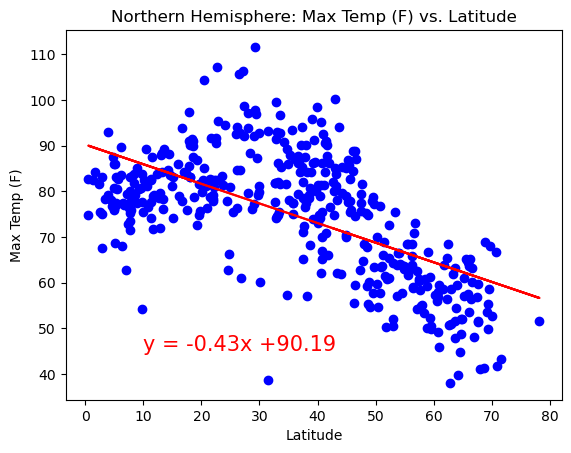

In [92]:
# Linear regression on Northern Hemisphere
# Data for linear regression
x_values= northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

#Perform the linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regression_line = slope * x_values + intercept

#Create the scatter plot
plt.scatter(x_values, y_values, color='blue')

#Plot the regression line
plt.plot(x_values, regression_line, color='red')

# Get regression values
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

#Create the line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Add labels etc.
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Northern Hemisphere: Max Temp (F) vs. Latitude')
plt.annotate(line_eq, (10,45), fontsize= 15, color="red")

#Print the r squared value
print(f"The r^2 value is: {r_value**2}")

plt.show()

The r^2 value is: 0.6026591158739214


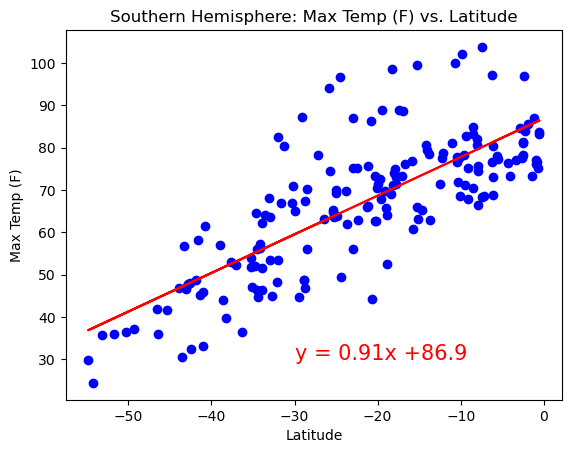

In [93]:
# Linear regression on Southern Hemisphere
# Data for linear regression
x_values= southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

#Perform the linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regression_line = slope * x_values + intercept

#Create the scatter plot
plt.scatter(x_values, y_values, color='blue')

#Plot the regression line
plt.plot(x_values, regression_line, color='red')

# Get regression values
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

#Create the line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Add labels etc.
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Southern Hemisphere: Max Temp (F) vs. Latitude')
plt.annotate(line_eq, (-30,30), fontsize= 15, color="red")

#Print the r squared value
print(f"The r^2 value is: {r_value**2}")

plt.show()

**Discussion about the linear relationship:** 

For the Northern Hemisphere, the regression shows a negative relationship between maximum temperature and latitude. As the latitude increases and the distance from the equator increases, the maximum temperature decreases. 
For the Southern Hemisphere, the regression shows a positive relationship between maximum temperature and latitude. As the latitude increases and the distance from the equator decreases, the temperature increases. 

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.0014637093215090784


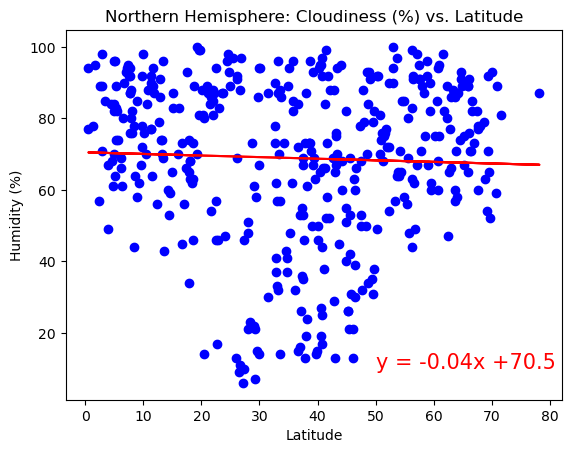

In [83]:
# Northern Hemisphere
# Data for linear regression
x_values= northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

#Perform the linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regression_line = slope * x_values + intercept

#Create the scatter plot
plt.scatter(x_values, y_values, color='blue')

#Plot the regression line
plt.plot(x_values, regression_line, color='red')

# Get regression values
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

#Create the line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Add labels etc.
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere: Cloudiness (%) vs. Latitude')
plt.annotate(line_eq, (50,10), fontsize= 15, color="red")

#Print the r squared value
print(f"The r^2 value is: {r_value**2}")

plt.show()

The r^2 value is: 0.006179699585910579


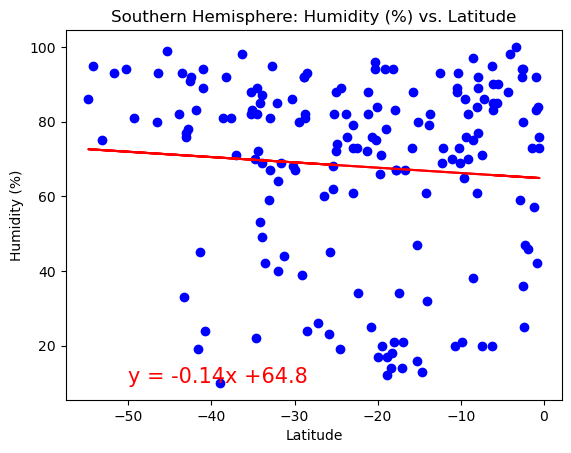

In [84]:
# Southern Hemisphere
# Data for linear regression
x_values= southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

#Perform the linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regression_line = slope * x_values + intercept

#Create the scatter plot
plt.scatter(x_values, y_values, color='blue')

#Plot the regression line
plt.plot(x_values, regression_line, color='red')

# Get regression values
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

#Create the line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Add labels etc.
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere: Humidity (%) vs. Latitude')
plt.annotate(line_eq, (-50,10), fontsize= 15, color="red")

#Print the r squared value
print(f"The r^2 value is: {r_value**2}")

plt.show()

**Discussion about the linear relationship:** 

For the Northern Hemisphere and Southern Hemisphere, the regression shows a slightly negative relationship between humidity and latitude. The r-squared value shows that there is little to no relationship between humidity and latitude; meaning that distance from the equator has no real effect on humidity. This is because the data for humidity is too spread out to find a relationship with latitude. 


### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.039541792538569785


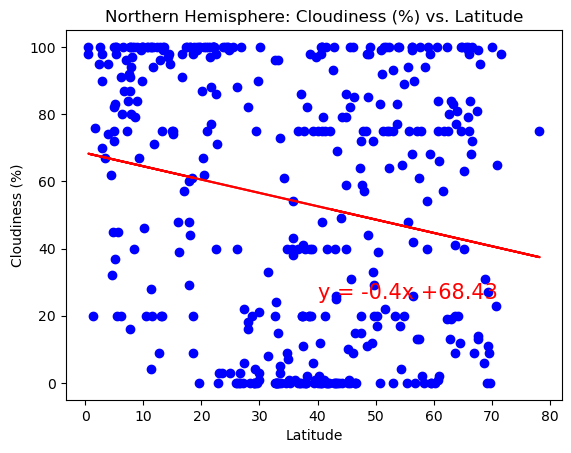

In [85]:
# Northern Hemisphere
# Data for linear regression
x_values= northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

#Perform the linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regression_line = slope * x_values + intercept

#Create the scatter plot
plt.scatter(x_values, y_values, color='blue')

#Plot the regression line
plt.plot(x_values, regression_line, color='red')

# Get regression values
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

#Create the line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Add labels etc.
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere: Cloudiness (%) vs. Latitude')
plt.annotate(line_eq, (40,25), fontsize= 15, color="red")

#Print the r squared value
print(f"The r^2 value is: {r_value**2}")

plt.show()

The r^2 value is: 0.001686032180487311


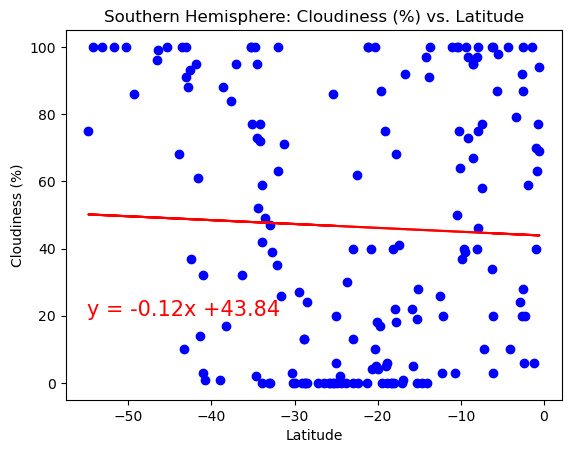

In [86]:
# Southern Hemisphere
# Data for linear regression
x_values= southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

#Perform the linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regression_line = slope * x_values + intercept

#Create the scatter plot
plt.scatter(x_values, y_values, color='blue')

#Plot the regression line
plt.plot(x_values, regression_line, color='red')

# Get regression values
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

#Create the line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Add labels etc.
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere: Cloudiness (%) vs. Latitude')
plt.annotate(line_eq, (-55,20), fontsize= 15, color="red")

#Print the r squared value
print(f"The r^2 value is: {r_value**2}")

plt.show()

**Discussion about the linear relationship:** 
For the Northern Hemisphere and Southern Hemisphere, the regression shows a slightly negative relationship between cloudiness and latitude. The r-squared value shows that there is little to no relationship between cloudiness and latitude; meaning that distance from the equator has no real effect on cloudiness. This is because the data for cloudiness is too spread out to find a relationship with latitude. 


### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.00020243171381657186


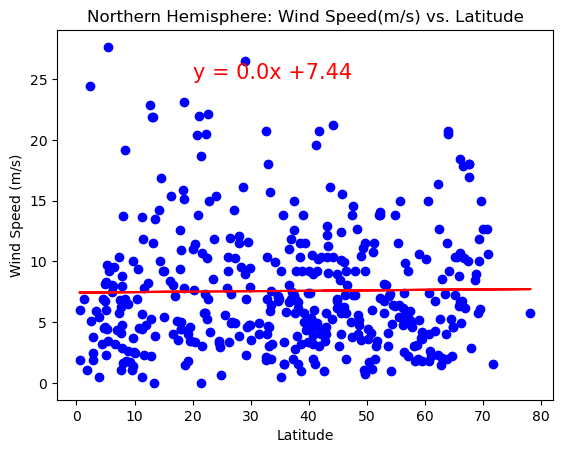

In [88]:
# Northern Hemisphere
# Data for linear regression
x_values= northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

#Perform the linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regression_line = slope * x_values + intercept

#Create the scatter plot
plt.scatter(x_values, y_values, color='blue')

#Plot the regression line
plt.plot(x_values, regression_line, color='red')

# Get regression values
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

#Create the line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Add labels etc.
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Northern Hemisphere: Wind Speed(m/s) vs. Latitude')
plt.annotate(line_eq, (20,25), fontsize= 15, color="red")

#Print the r squared value
print(f"The r^2 value is: {r_value**2}")

plt.show()

The r^2 value is: 0.00982645576266427


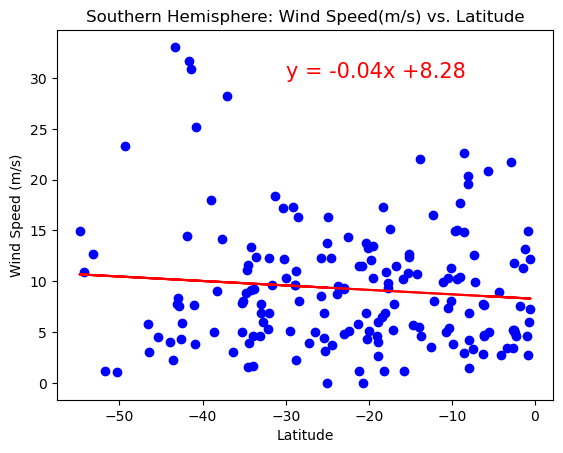

In [90]:
# Southern Hemisphere
# Data for linear regression
x_values= southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

#Perform the linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regression_line = slope * x_values + intercept

#Create the scatter plot
plt.scatter(x_values, y_values, color='blue')

#Plot the regression line
plt.plot(x_values, regression_line, color='red')

# Get regression values
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

#Create the line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Add labels etc.
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Southern Hemisphere: Wind Speed(m/s) vs. Latitude')
plt.annotate(line_eq, (-30,30), fontsize= 15, color="red")

#Print the r squared value
print(f"The r^2 value is: {r_value**2}")

plt.show()

**Discussion about the linear relationship:** 

For both hemispheres, we can see that there is little to no relationship between wind speed and latitude. The r-squared value is too close to zero for there to be a correlation between the two variables. 